In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl

# For inline plotting 

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Plot parameters defined globally
mpl.rcParams['text.usetex'] = True

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

### 9. Auto.csv

In [33]:
df_auto = pd.read_csv('Auto.csv')

In [34]:
np.any(df_auto.isna()) # check if any missing values exist 

False

In [35]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [36]:
# dtype is object for the horsepower column, this is weird 

In [37]:
df_auto['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

### It seems like there are missing values only in the horsepower column marked as a string '?'. To deal with this we can first change '?' strings to NaN, by loading the data again with an option like the syntax: It could be also useful to turn the dtype of the 'horsepower' column into a floating numbers, see e.g below: 

In [38]:
df_auto = pd.read_csv('Auto.csv', na_values = ['?']) # new dataframe that deals with the missing values '?'

In [39]:
df_auto['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

### Note that this also automatically dealt with the dtype of this column now it is an array with floating numbers. Now lets drop the rows that has nan in the horsepower attribute

In [40]:
print(f"Total number of observations in the data set before dropping rows corresponding to nan {df_auto.shape[0]}")
print(f'\n')
df_auto = df_auto.dropna()
print(f'Number of observations after dropping nan rows {df_auto.shape[0]}')

Total number of observations in the data set before dropping rows corresponding to nan 397


Number of observations after dropping nan rows 392


In [41]:
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [42]:
df_auto['origin'].unique()

array([1, 3, 2])

In [43]:
df_auto['cylinders'].unique()

array([8, 4, 6, 3, 5])

In [46]:
df_quant = df_auto.drop(columns='name')

df_quant.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


### a) Among the rest of predictors we may consider the origin and cylinders as a qualitative predictors they take on several distinctive values. Though all of them takes on numerical values so we will consider them as a quantitative predictors.

### b) Range of Quantitative variables 

In [47]:
df_quant.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [48]:
print('The range of quantitative variables:')
print('\n')
for col in df_quant.columns:
    print(f"The range of the {col} predictor is between {df_auto.describe().loc['min'][col]} and {df_auto.describe().loc['max'][col]}")


The range of quantitative variables:


The range of the mpg predictor is between 9.0 and 46.6
The range of the cylinders predictor is between 3.0 and 8.0
The range of the displacement predictor is between 68.0 and 455.0
The range of the horsepower predictor is between 46.0 and 230.0
The range of the weight predictor is between 1613.0 and 5140.0
The range of the acceleration predictor is between 8.0 and 24.8
The range of the year predictor is between 70.0 and 82.0
The range of the origin predictor is between 1.0 and 3.0


### c) Mean and standard deviation of the quantitative predictors 

In [49]:
print('The mean and standard deviation of quantitative variables:')
print('\n')
for col in df_quant.columns:
    print(f"The mean and the std of the {col} predictor are {df_auto.describe().loc['mean'][col]:.2f} and {df_auto.describe().loc['std'][col]:.2f}")

The mean and standard deviation of quantitative variables:


The mean and the std of the mpg predictor are 23.45 and 7.81
The mean and the std of the cylinders predictor are 5.47 and 1.71
The mean and the std of the displacement predictor are 194.41 and 104.64
The mean and the std of the horsepower predictor are 104.47 and 38.49
The mean and the std of the weight predictor are 2977.58 and 849.40
The mean and the std of the acceleration predictor are 15.54 and 2.76
The mean and the std of the year predictor are 75.98 and 3.68
The mean and the std of the origin predictor are 1.58 and 0.81


### d) Remove 10th through 85th observation and re-calculate range, mean and std of each quantitative predictor.  

In [59]:
df_quantnew = df_quant.drop(df_quant.index[10:85])

df_quantnew.shape

(317, 8)

In [60]:
new_desc = df_quantnew.describe()

new_desc.loc['range'] = new_desc.loc['max'] - new_desc.loc['min']

new_desc.loc['range']

mpg               35.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3348.0
acceleration      16.3
year              12.0
origin             2.0
Name: range, dtype: float64

In [61]:
new_desc.loc['mean']

mpg               24.374763
cylinders          5.381703
displacement     187.880126
horsepower       101.003155
weight          2938.854890
acceleration      15.704101
year              77.123028
origin             1.599369
Name: mean, dtype: float64

In [62]:
new_desc.loc['std']

mpg               7.872565
cylinders         1.658135
displacement    100.169973
horsepower       36.003208
weight          811.640668
acceleration      2.719913
year              3.127158
origin            0.819308
Name: std, dtype: float64

### e)-f) Using the full data set, let's look at the relations between different variables in the data. Which variables would be useful in predicting mpg?

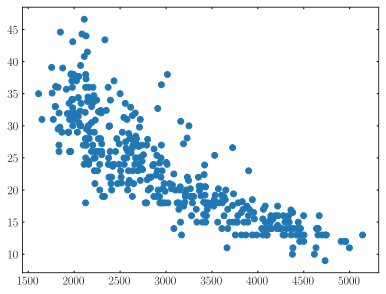

In [63]:
plt.scatter(df_quant['weight'],df_quant['mpg'])

- As expected, heavier the car, less miles it can traverse per gallon.

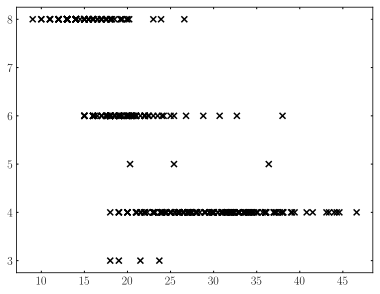

In [64]:
plt.scatter(df_quant['mpg'],df_quant['cylinders'], color = 'black', marker = 'x')

- Not much useful data for 3 cylinder cars but 4-5-6-8 cylinder cars tells us that, high cylinder numbers corresponds to small miles per gallon

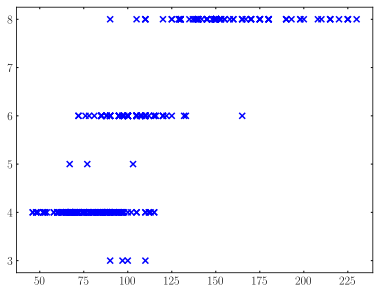

In [65]:
plt.scatter(df_quant['horsepower'],df_quant['cylinders'], color = 'blue', marker = 'x')

- large number of cylinders correlates with high horsepower

<Axes: xlabel='origin', ylabel='mpg'>

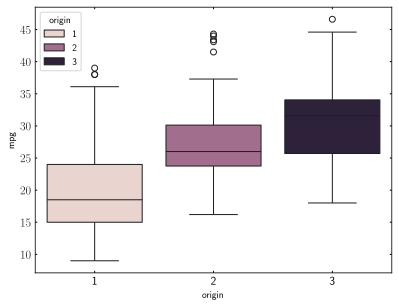

In [74]:
sns.boxplot(x='origin', y='mpg', data=df_quant, hue = 'origin')

- Origin might not be a good discriminator for mpg, origin 2/3 type cars have more mpg than origin 1

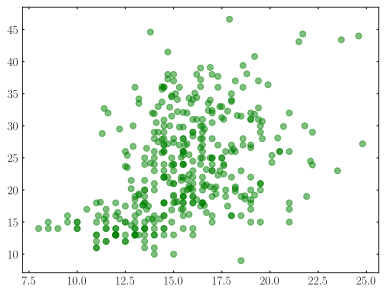

In [75]:
plt.scatter(df_quant['acceleration'],df_quant['mpg'], color = 'green', marker = 'o', alpha=0.5)

- Acceleartion does not seem to be strongly related to mpg 

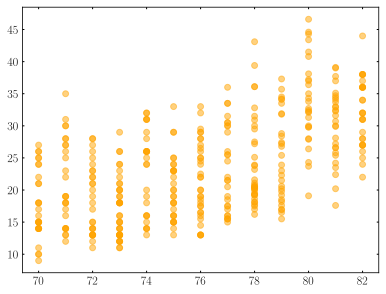

In [76]:
plt.scatter(df_quant['year'],df_quant['mpg'], color = 'orange', marker = 'o', alpha = 0.5)

- Fuel consumption of vehicles become less per mile, as mpg increases over the years. In other words, cars become more efficient in terms of fuel consumption. 

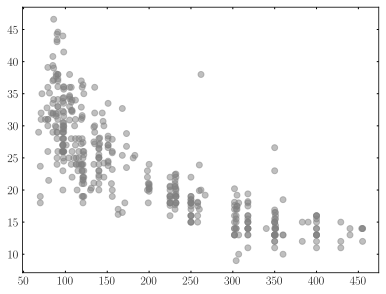

In [77]:
plt.scatter(df_quant['displacement'],df_quant['mpg'], color = 'gray', marker = 'o', alpha=0.5)

- Displacement correlates inversely with mpg, large displacement corresponds to less miles per gallon